In [91]:
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer

from matplotlib import pyplot as plt

from jupyterthemes import jtplot # Allows us to change plots that look better with dark themes.

jtplot.style(theme='chesterish') # dark theme for plots.

%matplotlib inline

In [92]:
tweets = pd.read_csv('trumptweets.csv')

In [93]:
tweets.head()

,id,link,content,date,retweets,favorites,mentions,hashtags,geo
0,1698308935,https://twitter.com/realDonaldTrump/status/169...,Be sure to tune in and watch Donald Trump on L...,2009-05-04 20:54:25,500,868,NaN,NaN,NaN
1,1701461182,https://twitter.com/realDonaldTrump/status/170...,Donald Trump will be appearing on The View tom...,2009-05-05 03:00:10,33,273,NaN,NaN,NaN
2,1737479987,https://twitter.com/realDonaldTrump/status/173...,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 15:38:08,12,18,NaN,NaN,NaN
3,1741160716,https://twitter.com/realDonaldTrump/status/174...,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 22:40:15,11,24,NaN,NaN,NaN
4,1773561338,https://twitter.com/realDonaldTrump/status/177...,"""My persona will never be that of a wallflower...",2009-05-12 16:07:28,1399,1965,NaN,NaN,NaN


In [94]:
text = tweets['content']

In [95]:
text[12]

'"...these days...we could all use a little of the power of Trumpative thinking." –BarnesandNoble.com http://tinyurl.com/pqpfvm'

In [96]:
text = text.apply(lambda x: re.sub(r"\b\S*\.\S*\b", '', x))

In [97]:
vect = CountVectorizer(stop_words='english').fit(text)
bag_o_words = vect.transform(text)
sum_words = bag_o_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vect.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

words_freq

[('realdonaldtrump', 8635),
 ('great', 6192),
 ('trump', 5366),
 ('president', 2819),
 ('thank', 2777),
 ('just', 2563),
 ('people', 2479),
 ('thanks', 2271),
 ('donald', 1863),
 ('country', 1856),
 ('new', 1829),
 ('america', 1765),
 ('obama', 1720),
 ('like', 1640),
 ('time', 1636),
 ('good', 1603),
 ('big', 1568),
 ('don', 1518),
 ('make', 1499),
 ('today', 1202),
 ('going', 1165),
 ('run', 1160),
 ('vote', 1119),
 ('news', 1097),
 ('best', 1089),
 ('want', 1042),
 ('love', 1030),
 ('need', 1004),
 ('think', 1003),
 ('democrats', 946),
 ('job', 943),
 ('really', 941),
 ('china', 915),
 ('years', 894),
 ('true', 888),
 ('doing', 884),
 ('hillary', 871),
 ('know', 857),
 ('bad', 847),
 ('win', 830),
 ('world', 830),
 ('deal', 823),
 ('american', 820),
 ('way', 813),
 ('work', 812),
 ('barackobama', 812),
 ('tonight', 801),
 ('day', 779),
 ('did', 763),
 ('trump2016', 757),
 ('fake', 754),
 ('border', 749),
 ('said', 747),
 ('right', 725),
 ('media', 720),
 ('jobs', 714),
 ('better', 7

In [117]:
t = pd.DataFrame.from_records(words_freq, columns=['word', 'count'])
t.sort_values('count', ascending=False)

,word,count
0,realdonaldtrump,8635
1,great,6192
2,trump,5366
3,president,2819
4,thank,2777
...,...,...
22063,melemallory,1
22062,screenplaywritr,1
22061,veuveclicquot,1
22060,sohi,1


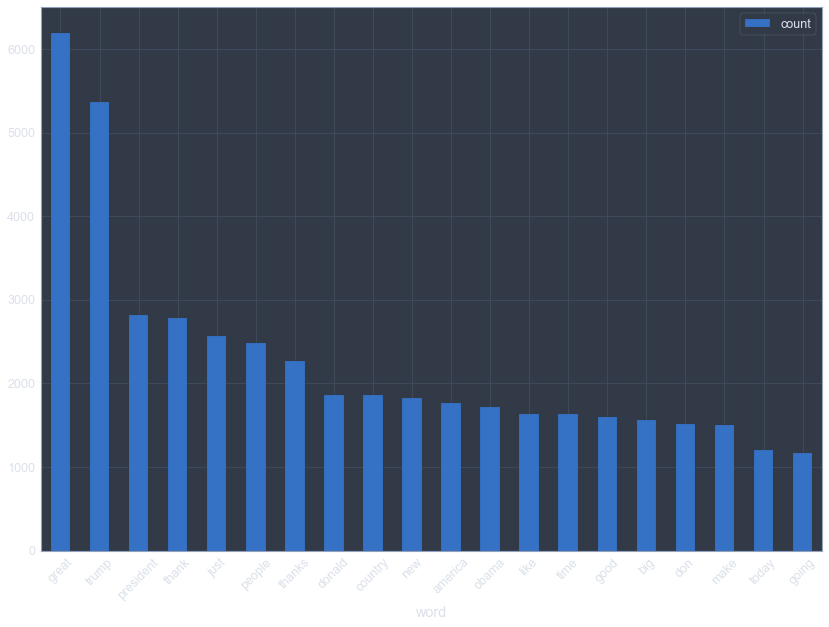

In [118]:
fig, ax = plt.subplots(figsize=(14,10))
t.iloc[1:21].plot(kind='bar', x='word', y='count', ax=ax, rot=45);
